ELBOW METHOD

In [ ]:
#to get optimal no. of clusters
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
#generate synthetic data using make_blobs
X,y =make_blobs(n_samples=300,centers=4,random_state=42)

In [ ]:
# Calculate the sum of squared distances (inertia) for different numbers
inertia = []
k_range = range (1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k , random_state = 42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

<function matplotlib.pyplot.show(close=None, block=None)>

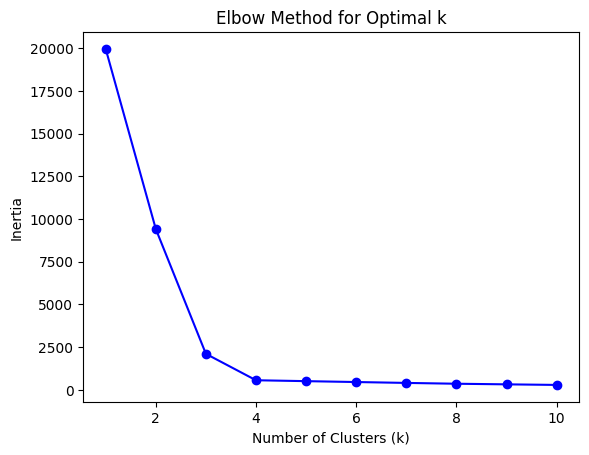

In [ ]:
#plot the inertia values to identify the 'elbow'
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show

K-Means ++

In [ ]:
#Kmeans++ using blobs and without using library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [ ]:
def kmeans_plus_plus_plus(X, k):
  n_samples, _ = X.shape
  #initialize centroid list and randomly select the first centroid
  centroids = [X[np.random.choice(n_samples)]]
  #select the rest of the centroids
  for _ in range(1, k):
    #calculate the distance of each point from the closest centroid
    dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in x])
    #calculate the probability of each point as the next centroid
    prob = dist_sq/dist_sq.sum()
    #select the next centroid based on computed probabilities
    centroids.append(X[np.random.choice(n_samples, p=prob)])
    centroids.append(next_centroid)
  return np.array(centroids)



In [ ]:
def kmeans(X, k, max_iters = 300, tol = 1e-4): #tol represents tolerrance
  #initialize centroids using k means++
  n_samples, _ = X.shape
  #initialize the centroids
  centroids = kmeans_plus_plus_plus(X, k)
  for i in range(max_iters):
    #Assign clusters based on closest centroid
    clusters = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
    #calculate new centroids from the clusters
    new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])
    #check for convergence
    if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
      break
    centroids = new_centroids
  return clusters, centroids


In [ ]:
#generate synthetic data using make blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std= 0.60, random_state =0)

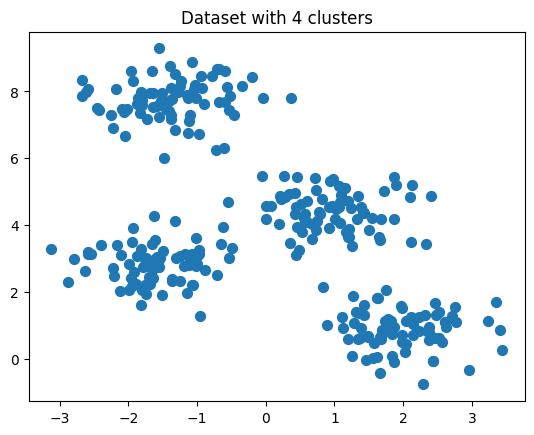

In [ ]:
plt.scatter(X[:, 0],X[: , 1], s= 50)
plt.title('Dataset with 4 clusters')
plt.show()

In [ ]:
#No. of clusters
k=4
#run kmeans algo
centroids, clusters = kmeans(X, k)
#Plot the result
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-means Clustering')
plt.show()

NameError: name 'x' is not defined